**Importing libraries and dataset:**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# We'll use make_circles dataset from scikit_learn
from sklearn.datasets import make_circles

SEED = 2017

**First, we need to create the training data:**

In [0]:
# We create an inner and outer circle

X, y = make_circles(n_samples = 400, factor = 0.3, noise = 0.05,
                    random_state = 2017)

outer = y == 0
inner = y == 1

**Plotting the data to show the 2 classes:**

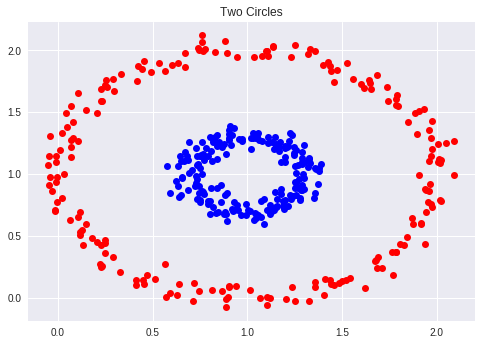

In [10]:
plt.title("Two Circles")

plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1], "bo")
plt.show()

# Example of non - linearly separable data

**We normalize the data to make sure the center of both circles is (1, 1):**

In [0]:
X = X + 1

**To determine the performance of our algorithm, we split our data:**

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = SEED)

**A linear activation function won't work in this case, so we'll use a sigmoid function:**

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

**Defining the hyperparameters:**

In [0]:
n_hidden = 50  # number of hidden units
n_epochs = 1000
learning_rate = 1

**Initialize the weights and other variables:**

In [0]:
# Initialize the weights

weights_hidden = np.random.normal(0.0, size = (X_train.shape[1],
                                               n_hidden))
weights_output = np.random.normal(0.0, size = (n_hidden))

hist_loss = []
hist_accuracy = []

**Run the single - layer neural network and output the statistics:**

In [9]:
for e in range(n_epochs):
  del_w_hidden = np.zeros(weights_hidden.shape)
  del_w_output = np.zeros(weights_output.shape)
  
  # Loop through training data in batches of 1
  for x_, y_ in zip(X_train, y_train):
    
    # Forward computations
    hidden_input = np.dot(x_, weights_hidden)
    hidden_output = sigmoid(hidden_input)
    output = sigmoid(np.dot(hidden_output, weights_output))
    
    # Backward computations
    error = y_ - output
    output_error = error * output * (1 - output)
    hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)
    del_w_output += output_error * hidden_output
    del_w_hidden += hidden_error * x_[:, None]
    
  # Update weights
  weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
  weights_output += learning_rate * del_w_output / X_train.shape[0]
  
  # Print stats (validation loss and accuracy)
  if e % 100 == 0:
    hidden_output = sigmoid(np.dot(X_val, weights_hidden))
    out = sigmoid(np.dot(hidden_output, weights_output))
    loss = np.mean((out - y_val) ** 2)
    # Final prediction is based on a threshold of 0.5
    predictions = out > 0.5
    accuracy = np.mean(predictions == y_val)
    print("Epoch: ", '{:>4}'.format(e),
          "; Validation loss: ", '{:>6}'.format(loss.round(4)),
          "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))  

Epoch:     0 ; Validation loss:  0.2652 ; Validation accuracy:   0.375
Epoch:   100 ; Validation loss:  0.2421 ; Validation accuracy:   0.675
Epoch:   200 ; Validation loss:  0.2045 ; Validation accuracy:    0.75
Epoch:   300 ; Validation loss:  0.1685 ; Validation accuracy:   0.825
Epoch:   400 ; Validation loss:  0.1397 ; Validation accuracy:    0.85
Epoch:   500 ; Validation loss:  0.1182 ; Validation accuracy:    0.85
Epoch:   600 ; Validation loss:  0.1022 ; Validation accuracy:  0.8875
Epoch:   700 ; Validation loss:    0.09 ; Validation accuracy:    0.95
Epoch:   800 ; Validation loss:  0.0804 ; Validation accuracy:     1.0
Epoch:   900 ; Validation loss:  0.0727 ; Validation accuracy:     1.0
